# Riduzione della dimensionalità con PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from modules import ngs
from modules import microarray 
from sklearn.decomposition import PCA

## RNA-Seq data

In [2]:
df = ngs.get_ds()
df = ngs.attach_label(df, 'SUBTYPE')

In [3]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(df.drop('SUBTYPE', axis=1))

In [4]:
pcdf = pd.DataFrame(data=pcs, columns = ['pc-1', 'pc-2'])
pcdf.index = df.index

In [5]:
pcdf = pd.concat([pcdf, df[['SUBTYPE']]], axis=1)
pcdf.head()

,pc-1,pc-2,SUBTYPE
TCGA-3C-AAAU-01,-93.263294,-43.971674,BRCA_LumA
TCGA-3C-AALI-01,293.643905,73.819238,BRCA_Her2
TCGA-3C-AALJ-01,1655.407829,-42.408843,BRCA_LumB
TCGA-3C-AALK-01,-94.511721,-14.641517,BRCA_LumA
TCGA-4H-AAAK-01,-96.175465,-27.831583,BRCA_LumA


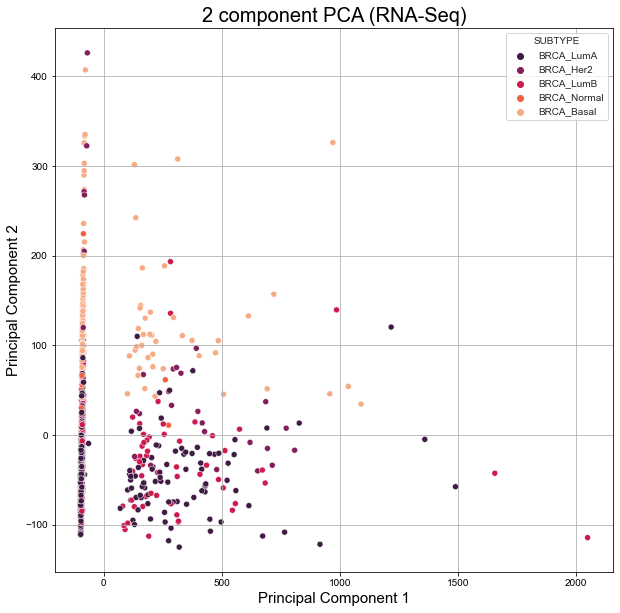

In [6]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA (RNA-Seq)', fontsize = 20)
sns.set_style("ticks",{'axes.grid' : True})
plt.grid()
sns.scatterplot(data=pcdf, x='pc-1', y='pc-2', hue='SUBTYPE', palette='rocket')
plt.savefig('plots/PCA_on_rnaseq.png')

## Microarray data

In [7]:
df = microarray.get_ds()
df = microarray.attach_label(df, 'CLAUDIN_SUBTYPE')

In [8]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(df.drop('CLAUDIN_SUBTYPE', axis=1))

In [9]:
pcdf = pd.DataFrame(data=pcs, columns = ['pc-1', 'pc-2'])
pcdf.index = df.index

In [10]:
pcdf = pd.concat([pcdf, df[['CLAUDIN_SUBTYPE']]], axis=1)

In [11]:
nc_rows = pcdf['CLAUDIN_SUBTYPE'] == 'NC'
pcdf = pcdf[-nc_rows]
pcdf.head()

,pc-1,pc-2,CLAUDIN_SUBTYPE
MB-0362,3.731086,-28.304564,LumA
MB-0346,6.529682,24.350532,Her2
MB-0386,-9.106829,-2.891132,LumA
MB-0574,3.577814,-28.778586,LumA
MB-0503,-6.280942,-23.597565,LumA


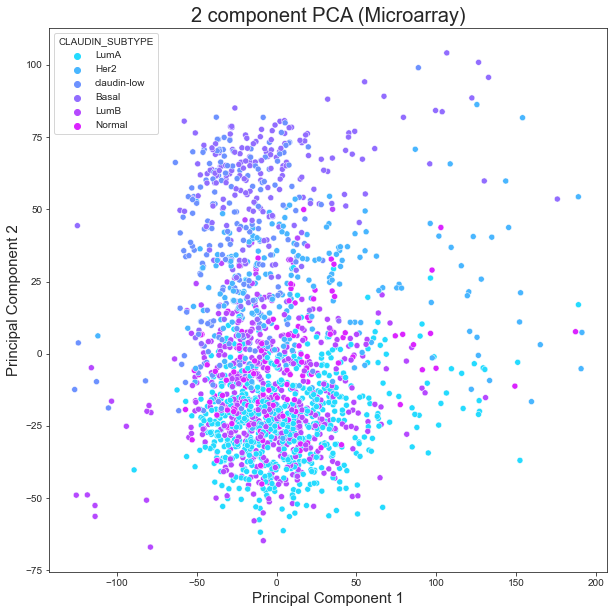

In [12]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA (Microarray)', fontsize = 20)
sns.set_style("ticks",{'axes.grid' : True})
plt.grid()
sns.scatterplot(data=pcdf, x='pc-1', y='pc-2', hue='CLAUDIN_SUBTYPE', palette='cool')
plt.savefig('plots/PCA_on_microarray.png')

## Feature correlation

In [17]:
df.head()

,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,LIN52,...,ENOX1,SBF2-AS1,VN1R4,UGGT1,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A,CLAUDIN_SUBTYPE
MB-0362,-0.539,-0.5288,-0.0428,-1.1005,0.7652,0.9422,-0.5147,-1.4466,0.2558,1.3792,...,-0.14,-0.9461,-0.8714,0.1058,0.44,-0.6258,0.0106,1.169,-1.1645,LumA
MB-0346,0.2795,-1.2666,-1.0604,-0.1582,-0.5049,-0.5246,3.9497,-1.2455,-0.8398,1.0669,...,-0.5651,0.1117,1.0546,0.3341,1.391,-0.4894,-0.8343,2.2786,0.0309,Her2
MB-0386,-0.7587,0.0692,3.2405,-0.9619,0.6749,0.196,-0.2159,-1.071,-1.419,0.3337,...,0.7967,-1.0461,0.3794,0.5909,1.597,10.5873,0.0608,1.6556,0.6789,LumA
MB-0574,-1.1358,-0.4942,-0.2908,2.2928,-1.0863,0.0116,-0.383,-1.1789,0.86,0.2752,...,0.9281,0.4911,-0.0839,0.2165,1.2502,1.7436,0.2816,0.4612,-0.3702,LumA
MB-0503,-0.7617,-0.136,1.2219,0.9885,-1.2386,0.4852,-0.6472,-1.0173,-0.4554,1.1501,...,-0.8045,0.2727,-0.7635,0.1313,0.6273,0.6634,-0.5208,0.3479,-1.2635,LumA


In [ ]:
import numpy as np

subtype_col = 'SUBTYPE' if 'SUBTYPE' in df else 'CLAUDIN_SUBTYPE'
corr_matrix = df.drop(subtype_col, axis=1).astype(float).corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [39]:
sol

100133144  100134869    0.472422
57714      8225         0.443729
280660     340602       0.406161
155060     8225         0.397657
100133144  645851       0.395898
                          ...   
340602     645851       0.001801
390284     652919       0.001471
391343     391714       0.000884
26823      442388       0.000572
652919     728603       0.000101
Length: 253, dtype: float64

<AxesSubplot:xlabel='x1', ylabel='x2'>

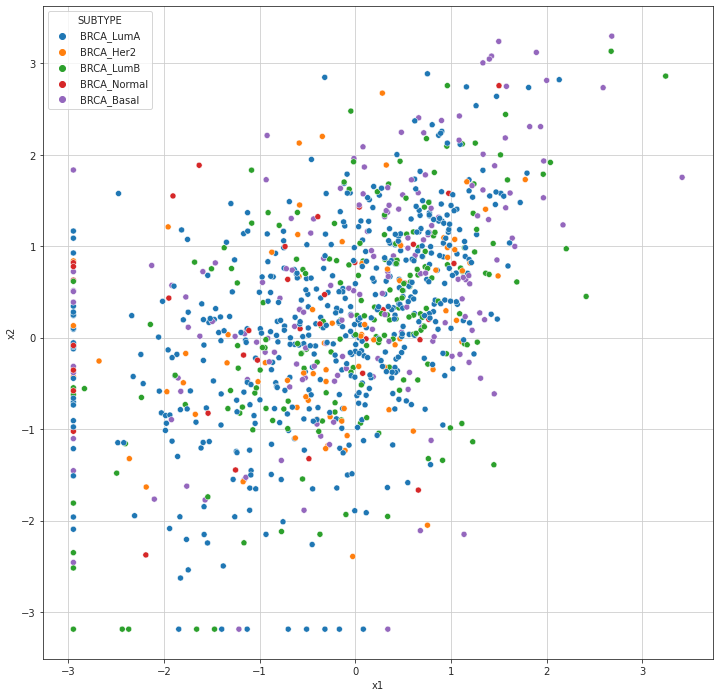

In [41]:
_df = df.rename(columns={100133144: 'x1', 100134869: 'x2'})
_df.head()
plt.figure(figsize=(12,12))
sns.scatterplot(data=_df, x='x1', y='x2', hue='SUBTYPE')